In [5]:
import numpy as np

import tsplib95
import networkx as nx

import os
import pandas as pd
import gilsrvnd
import DBMEA
import grasp
import pickle






In [3]:
df = pd.read_csv("matrix_final.csv")
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,between_var,between_q25,between_q75,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.000008,0.022051,0.026965,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.000065,0.021686,0.032662,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000591,0.020050,0.042040,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.000097,0.000000,0.006410,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.000788,0.033226,0.062177,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,line_90_5.tsp,55730.0,57558.0,157350.0,35.477098,36.326975,0.233857,GILS_cost,90,4095,...,0.000435,0.050520,0.072751,0.002192,0.004113,0.003227,0.000642,4.123292e-07,0.002620,0.003881
335,line_90_6.tsp,48884.0,45916.0,128976.0,30.191444,37.348990,0.232372,DBMEA_cost,90,4095,...,0.000730,0.049839,0.071527,0.002220,0.004410,0.003481,0.000709,5.026715e-07,0.002873,0.004060
336,line_90_7.tsp,51464.0,49038.0,124368.0,28.821121,44.483338,0.232510,DBMEA_cost,90,4095,...,0.000393,0.048856,0.069497,0.002238,0.005424,0.004240,0.000992,9.846681e-07,0.003531,0.005157
337,line_90_8.tsp,60845.0,65825.0,123373.0,28.282006,39.745050,0.231058,GILS_cost,90,4095,...,0.000680,0.049190,0.072960,0.002171,0.004137,0.003256,0.000649,4.205608e-07,0.002625,0.003914


In [4]:
X = df.drop(['file', 'min_method', "GILS_cost", "GILS_time", "GRASP_cost", "GRASP_time", "DBMEA_cost", "DBMEA_time"], axis=1)
y = df['min_method']

In [6]:
# load the classifier decisiontree.pkl
decisiontree = pickle.load(open('decisiontree.pkl', 'rb'))

In [8]:
# predict the class for the new data point
ypred = decisiontree.predict(X)
ypred

array(['DBMEA_cost', 'DBMEA_cost', 'GILS_cost', 'GRASP_time',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'GILS_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost',
       'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost',
       'GILS_cost', 'DBMEA_cost', 'DBMEA_cost', 'GILS_cost', 'GILS_cost',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost', 'DBMEA_cost',
       'DBMEA_cost', 'DBMEA_cost', 'GRASP_time', 'GRASP_time',
       'GRASP_time', 'GRASP_time', 'GRASP_time', 'GRASP_time',
       'GRASP_time', 'GRASP_time', 'GRASP_time', 'GRASP_time',
       'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost',
       'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost', 'GILS_cost

In [9]:
df["prediction"] = ypred

In [10]:
# create a new column, if prediction == min_method, then 1, else 0
df["correct"] = np.where(df["prediction"] == df["min_method"], 1, 0)
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,between_q75,closeness_min,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,correct
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.026965,0.000574,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,1
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.032662,0.000919,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,1
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.042040,0.000201,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,1
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.006410,0.001313,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,1
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.062177,0.008369,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,line_90_5.tsp,55730.0,57558.0,157350.0,35.477098,36.326975,0.233857,GILS_cost,90,4095,...,0.072751,0.002192,0.004113,0.003227,0.000642,4.123292e-07,0.002620,0.003881,GILS_cost,1
335,line_90_6.tsp,48884.0,45916.0,128976.0,30.191444,37.348990,0.232372,DBMEA_cost,90,4095,...,0.071527,0.002220,0.004410,0.003481,0.000709,5.026715e-07,0.002873,0.004060,GILS_cost,0
336,line_90_7.tsp,51464.0,49038.0,124368.0,28.821121,44.483338,0.232510,DBMEA_cost,90,4095,...,0.069497,0.002238,0.005424,0.004240,0.000992,9.846681e-07,0.003531,0.005157,GILS_cost,0
337,line_90_8.tsp,60845.0,65825.0,123373.0,28.282006,39.745050,0.231058,GILS_cost,90,4095,...,0.072960,0.002171,0.004137,0.003256,0.000649,4.205608e-07,0.002625,0.003914,GILS_cost,1


In [11]:
df["correct"].value_counts()

correct
1    247
0     92
Name: count, dtype: int64

In [15]:
# new column called combined where the string = min_method + prediction
df["actual_predicted"] = df["min_method"] + " " + df["prediction"]
df

,file,GILS_cost,DBMEA_cost,GRASP_cost,GILS_time,DBMEA_time,GRASP_time,min_method,n,m,...,closeness_max,closeness_mean,closeness_std,closeness_var,closeness_q25,closeness_q75,prediction,correct,combined,actual_predicted
0,att48.tsp,226229.0,207771.0,301702.0,6.474685,5.288543,0.026019,DBMEA_cost,48,1176,...,0.001325,0.001012,0.000205,4.221718e-08,0.000889,0.001191,DBMEA_cost,1,DBMEA_cost DBMEA_cost,DBMEA_cost DBMEA_cost
1,berlin52.tsp,145419.0,143278.0,191072.0,6.054587,5.374160,0.031533,DBMEA_cost,52,1378,...,0.002555,0.001893,0.000507,2.566472e-07,0.001447,0.002371,DBMEA_cost,1,DBMEA_cost DBMEA_cost,DBMEA_cost DBMEA_cost
2,brazil58.tsp,532454.0,535150.0,709540.0,8.013889,9.045840,0.043413,GILS_cost,58,1711,...,0.000736,0.000562,0.000145,2.104825e-08,0.000458,0.000692,GILS_cost,1,GILS_cost GILS_cost,GILS_cost GILS_cost
3,burma14.tsp,16457.0,16457.0,18393.0,0.156218,0.082072,0.001000,GRASP_time,14,105,...,0.002677,0.002193,0.000407,1.654824e-07,0.002048,0.002518,GRASP_time,1,GRASP_time GRASP_time,GRASP_time GRASP_time
4,dantzig42.tsp,12392.0,12256.0,14523.0,2.579336,3.325098,0.016044,DBMEA_cost,42,903,...,0.019061,0.014587,0.003118,9.721282e-06,0.011758,0.016824,DBMEA_cost,1,DBMEA_cost DBMEA_cost,DBMEA_cost DBMEA_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,line_90_5.tsp,55730.0,57558.0,157350.0,35.477098,36.326975,0.233857,GILS_cost,90,4095,...,0.004113,0.003227,0.000642,4.123292e-07,0.002620,0.003881,GILS_cost,1,GILS_cost GILS_cost,GILS_cost GILS_cost
335,line_90_6.tsp,48884.0,45916.0,128976.0,30.191444,37.348990,0.232372,DBMEA_cost,90,4095,...,0.004410,0.003481,0.000709,5.026715e-07,0.002873,0.004060,GILS_cost,0,DBMEA_cost GILS_cost,DBMEA_cost GILS_cost
336,line_90_7.tsp,51464.0,49038.0,124368.0,28.821121,44.483338,0.232510,DBMEA_cost,90,4095,...,0.005424,0.004240,0.000992,9.846681e-07,0.003531,0.005157,GILS_cost,0,DBMEA_cost GILS_cost,DBMEA_cost GILS_cost
337,line_90_8.tsp,60845.0,65825.0,123373.0,28.282006,39.745050,0.231058,GILS_cost,90,4095,...,0.004137,0.003256,0.000649,4.205608e-07,0.002625,0.003914,GILS_cost,1,GILS_cost GILS_cost,GILS_cost GILS_cost


In [16]:
df["actual_predicted"].value_counts()

actual_predicted
DBMEA_cost DBMEA_cost    138
GILS_cost GILS_cost       81
DBMEA_cost GILS_cost      46
GILS_cost DBMEA_cost      38
GRASP_time GRASP_time     28
GRASP_time GILS_cost       5
DBMEA_cost GRASP_time      2
GILS_cost GRASP_time       1
Name: count, dtype: int64

array([[<Axes: title={'center': 'DBMEA_cost'}>]], dtype=object)

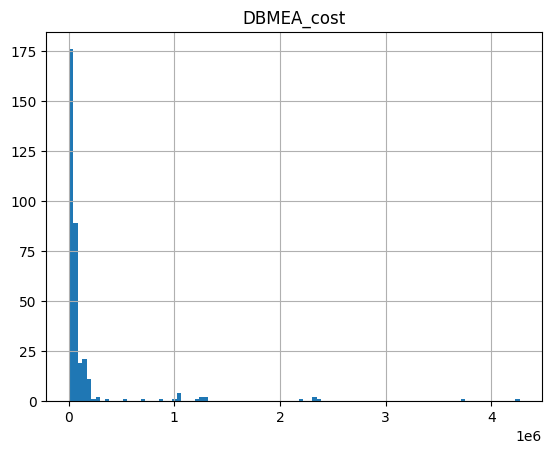

In [21]:
testingdf = df.copy()
# sort df by dbmea cost and plot the column
testingdf.sort_values(by=['DBMEA_cost'], inplace=True)
# plot histograms
testingdf.hist(column='DBMEA_cost', bins=100)

